# Cloudbutton Mandelbrot set calculation example
## Serverless matrix multiplication

In [this notebook](https://github.com/lithops-cloud/applications/blob/master/mandelbrot/example_mandelbrot.ipynb) we will calculate the Mandelbrot set on a limited space several times using the Cloudbutton toolkit. We will treat a certain region of the linear space as a matrix and we will divide it into chunks in order to
be able to distribute them among many functions. For each step, we will plot the corresponding image generated from the matrix.

Install the dependencies within an execution environment with the attached [requirements.txt](./requirements.txt) file.

In [ ]:
!pip install -r requirements.txt

In [1]:
import numpy as np
from math import sqrt
from matplotlib import colors
from matplotlib import pyplot as plt
from lithops.multiprocessing import Pool

%matplotlib widget

### Partitioning
We slice the matrix into many chunks (as many as concurrency) so that each function will treat one of these. Thus, function arguments will be the limits or boundaries of a chunk.

In [2]:
def parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, 
                     maxiter, concurrency):

    blocks_per_row = sqrt(concurrency)
    assert blocks_per_row == int(blocks_per_row), "concurrency must be square number"
    blocks_per_row = int(blocks_per_row)
    y_step = (ymax - ymin) / blocks_per_row
    x_step = (xmax - xmin) / blocks_per_row
    mat_block_sz = int(width / blocks_per_row)

    limits = []
    indexes = []
    for i in range(blocks_per_row):
        for j in range(blocks_per_row):
            limits.append((xmin + i*x_step, xmin + (i + 1)*x_step,
                            ymin + j*y_step, ymin + (j + 1)*y_step))
            indexes.append((i*mat_block_sz, (i + 1)*mat_block_sz,
                            j*mat_block_sz, (j + 1)*mat_block_sz))

    def mandelbrot_chunk_fn(limit, maxiter):
        rx = np.linspace(limit[0], limit[1], mat_block_sz)
        ry = np.linspace(limit[2], limit[3], mat_block_sz)
        c = rx + ry[:,None]*1j
        output = np.zeros((mat_block_sz, mat_block_sz))
        z = np.zeros((mat_block_sz, mat_block_sz), np.complex64)

        for it in range(maxiter+1):
            notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0)
            output[notdone] = it
            z[notdone] = z[notdone]**2 + c[notdone]

        return output.T

    with Pool() as pool:
        iterdata = [(limit, maxiter) for limit in limits]
        results = pool.starmap(mandelbrot_chunk_fn, iterdata)

    mat = np.zeros((width, height))
    for i, mat_chunk in enumerate(results):
        idx = indexes[i]
        mat[idx[0]:idx[1], idx[2]:idx[3]] = mat_chunk
        
    return mat

### Functions for plotting

In [3]:
dpi = 72

def create_subplots(width, height):
    img_width = width / dpi
    img_height = height / dpi
    fig, ax = plt.subplots(figsize=(img_width, img_height), dpi=dpi)
    
    plt.ion()
    fig.show()
    fig.canvas.draw()

    return fig, ax

def plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height):
    ticks = np.arange(0,width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/height
    plt.yticks(ticks, y_ticks)

    ax.imshow(mat.T, cmap='Spectral', origin='lower')
    fig.canvas.draw()

### Execution
We run the distributed calculation of the Mandelbrot set starting from a certain (interesting) point from space. Then, we adjust the boundaries to perform a zoom in.

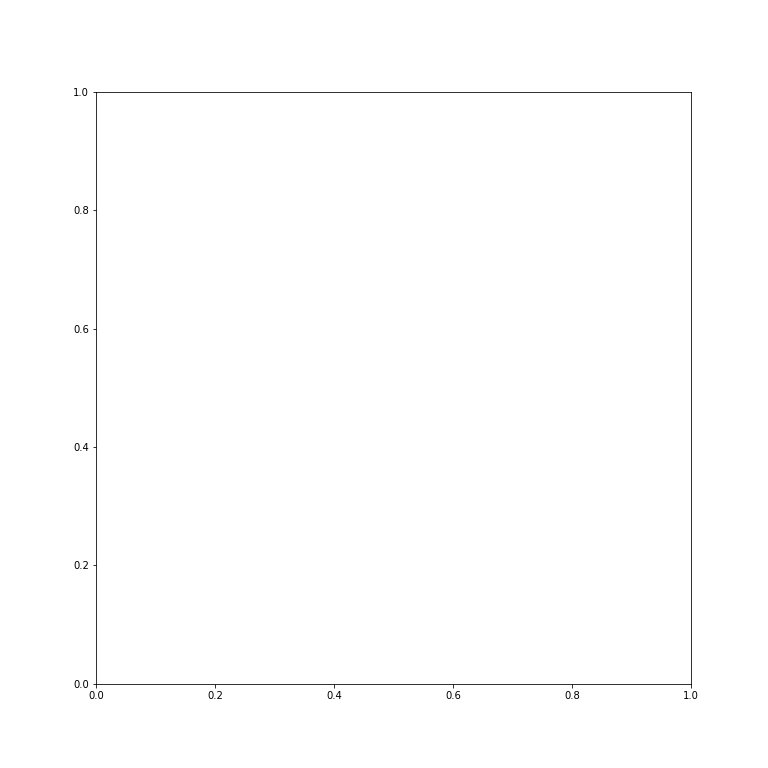

2024-12-17 21:11:00,777 [INFO] config.py:139 -- Lithops v3.5.1 - Python3.10
2024-12-17 21:11:00,786 [INFO] localhost.py:39 -- Localhost storage client created
2024-12-17 21:11:00,787 [INFO] localhost.py:78 -- Localhost compute v2 client created
2024-12-17 21:11:00,833 [INFO] invokers.py:119 -- ExecutorID 2b65cf-0 | JobID M000 - Selected Runtime: python 
2024-12-17 21:11:00,857 [INFO] invokers.py:186 -- ExecutorID 2b65cf-0 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2024-12-17 21:11:00,898 [INFO] invokers.py:225 -- ExecutorID 2b65cf-0 | JobID M000 - View execution logs at /tmp/lithops-german/logs/2b65cf-0-M000.log
2024-12-17 21:11:00,903 [INFO] executors.py:494 -- ExecutorID 2b65cf-0 - Getting results from 16 function activations
2024-12-17 21:11:00,909 [INFO] wait.py:101 -- ExecutorID 2b65cf-0 - Waiting for 16 function activations to complete


    0%|          | 0/16  

2024-12-17 21:11:02,389 [INFO] executors.py:618 -- ExecutorID 2b65cf-0 - Cleaning temporary data
2024-12-17 21:11:02,553 [INFO] config.py:139 -- Lithops v3.5.1 - Python3.10
2024-12-17 21:11:02,560 [INFO] localhost.py:39 -- Localhost storage client created
2024-12-17 21:11:02,561 [INFO] localhost.py:78 -- Localhost compute v2 client created
2024-12-17 21:11:02,596 [INFO] invokers.py:119 -- ExecutorID 2b65cf-1 | JobID M000 - Selected Runtime: python 
2024-12-17 21:11:02,618 [INFO] invokers.py:186 -- ExecutorID 2b65cf-1 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2024-12-17 21:11:02,665 [INFO] invokers.py:225 -- ExecutorID 2b65cf-1 | JobID M000 - View execution logs at /tmp/lithops-german/logs/2b65cf-1-M000.log
2024-12-17 21:11:02,672 [INFO] executors.py:494 -- ExecutorID 2b65cf-1 - Getting results from 16 function activations
2024-12-17 21:11:02,676 [INFO] wait.py:101 -- ExecutorID 2b65cf-1 - Waiting for 16 function activations to complete

    0%|          | 0/16  

2024-12-17 21:11:04,771 [INFO] executors.py:618 -- ExecutorID 2b65cf-1 - Cleaning temporary data
2024-12-17 21:11:04,959 [INFO] config.py:139 -- Lithops v3.5.1 - Python3.10
2024-12-17 21:11:04,964 [INFO] localhost.py:39 -- Localhost storage client created
2024-12-17 21:11:04,965 [INFO] localhost.py:78 -- Localhost compute v2 client created
2024-12-17 21:11:05,001 [INFO] invokers.py:119 -- ExecutorID 2b65cf-2 | JobID M000 - Selected Runtime: python 
2024-12-17 21:11:05,023 [INFO] invokers.py:186 -- ExecutorID 2b65cf-2 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2024-12-17 21:11:05,052 [INFO] invokers.py:225 -- ExecutorID 2b65cf-2 | JobID M000 - View execution logs at /tmp/lithops-german/logs/2b65cf-2-M000.log
2024-12-17 21:11:05,069 [INFO] executors.py:494 -- ExecutorID 2b65cf-2 - Getting results from 16 function activations
2024-12-17 21:11:05,073 [INFO] wait.py:101 -- ExecutorID 2b65cf-2 - Waiting for 16 function activations to complete

    0%|          | 0/16  

2024-12-17 21:11:07,150 [INFO] executors.py:618 -- ExecutorID 2b65cf-2 - Cleaning temporary data
2024-12-17 21:11:07,386 [INFO] config.py:139 -- Lithops v3.5.1 - Python3.10
2024-12-17 21:11:07,391 [INFO] localhost.py:39 -- Localhost storage client created
2024-12-17 21:11:07,392 [INFO] localhost.py:78 -- Localhost compute v2 client created
2024-12-17 21:11:07,427 [INFO] invokers.py:119 -- ExecutorID 2b65cf-3 | JobID M000 - Selected Runtime: python 
2024-12-17 21:11:07,450 [INFO] invokers.py:186 -- ExecutorID 2b65cf-3 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2024-12-17 21:11:07,485 [INFO] invokers.py:225 -- ExecutorID 2b65cf-3 | JobID M000 - View execution logs at /tmp/lithops-german/logs/2b65cf-3-M000.log
2024-12-17 21:11:07,500 [INFO] executors.py:494 -- ExecutorID 2b65cf-3 - Getting results from 16 function activations
2024-12-17 21:11:07,502 [INFO] wait.py:101 -- ExecutorID 2b65cf-3 - Waiting for 16 function activations to complete

    0%|          | 0/16  

2024-12-17 21:11:08,989 [ERROR] localhost.py:328 -- Task process 2b65cf-3-M000-00014 failed with return code -9
2024-12-17 21:11:08,990 [INFO] executors.py:618 -- ExecutorID 2b65cf-3 - Cleaning temporary data
2024-12-17 21:11:09,256 [INFO] config.py:139 -- Lithops v3.5.1 - Python3.10
2024-12-17 21:11:09,260 [INFO] localhost.py:39 -- Localhost storage client created
2024-12-17 21:11:09,261 [INFO] localhost.py:78 -- Localhost compute v2 client created
2024-12-17 21:11:09,295 [INFO] invokers.py:119 -- ExecutorID 2b65cf-4 | JobID M000 - Selected Runtime: python 
2024-12-17 21:11:09,318 [INFO] invokers.py:186 -- ExecutorID 2b65cf-4 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2024-12-17 21:11:09,350 [INFO] invokers.py:225 -- ExecutorID 2b65cf-4 | JobID M000 - View execution logs at /tmp/lithops-german/logs/2b65cf-4-M000.log
2024-12-17 21:11:09,368 [INFO] executors.py:494 -- ExecutorID 2b65cf-4 - Getting results from 16 function activations
202

    0%|          | 0/16  

2024-12-17 21:11:10,854 [INFO] executors.py:618 -- ExecutorID 2b65cf-4 - Cleaning temporary data
2024-12-17 21:11:11,218 [INFO] config.py:139 -- Lithops v3.5.1 - Python3.10
2024-12-17 21:11:11,224 [INFO] localhost.py:39 -- Localhost storage client created
2024-12-17 21:11:11,225 [INFO] localhost.py:78 -- Localhost compute v2 client created
2024-12-17 21:11:11,266 [INFO] invokers.py:119 -- ExecutorID 2b65cf-5 | JobID M000 - Selected Runtime: python 
2024-12-17 21:11:11,288 [INFO] invokers.py:186 -- ExecutorID 2b65cf-5 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2024-12-17 21:11:11,336 [INFO] invokers.py:225 -- ExecutorID 2b65cf-5 | JobID M000 - View execution logs at /tmp/lithops-german/logs/2b65cf-5-M000.log
2024-12-17 21:11:11,339 [INFO] executors.py:494 -- ExecutorID 2b65cf-5 - Getting results from 16 function activations
2024-12-17 21:11:11,340 [INFO] wait.py:101 -- ExecutorID 2b65cf-5 - Waiting for 16 function activations to complete

    0%|          | 0/16  

2024-12-17 21:11:13,022 [INFO] executors.py:618 -- ExecutorID 2b65cf-5 - Cleaning temporary data
2024-12-17 21:11:13,424 [INFO] config.py:139 -- Lithops v3.5.1 - Python3.10
2024-12-17 21:11:13,429 [INFO] localhost.py:39 -- Localhost storage client created
2024-12-17 21:11:13,430 [INFO] localhost.py:78 -- Localhost compute v2 client created
2024-12-17 21:11:13,465 [INFO] invokers.py:119 -- ExecutorID 2b65cf-6 | JobID M000 - Selected Runtime: python 
2024-12-17 21:11:13,487 [INFO] invokers.py:186 -- ExecutorID 2b65cf-6 | JobID M000 - Starting function invocation: cloud_process_wrapper() - Total: 16 activations
2024-12-17 21:11:13,511 [INFO] invokers.py:225 -- ExecutorID 2b65cf-6 | JobID M000 - View execution logs at /tmp/lithops-german/logs/2b65cf-6-M000.log
2024-12-17 21:11:13,534 [INFO] executors.py:494 -- ExecutorID 2b65cf-6 - Getting results from 16 function activations
2024-12-17 21:11:13,536 [INFO] wait.py:101 -- ExecutorID 2b65cf-6 - Waiting for 16 function activations to complete

    0%|          | 0/16  

2024-12-17 21:11:15,214 [INFO] executors.py:618 -- ExecutorID 2b65cf-6 - Cleaning temporary data


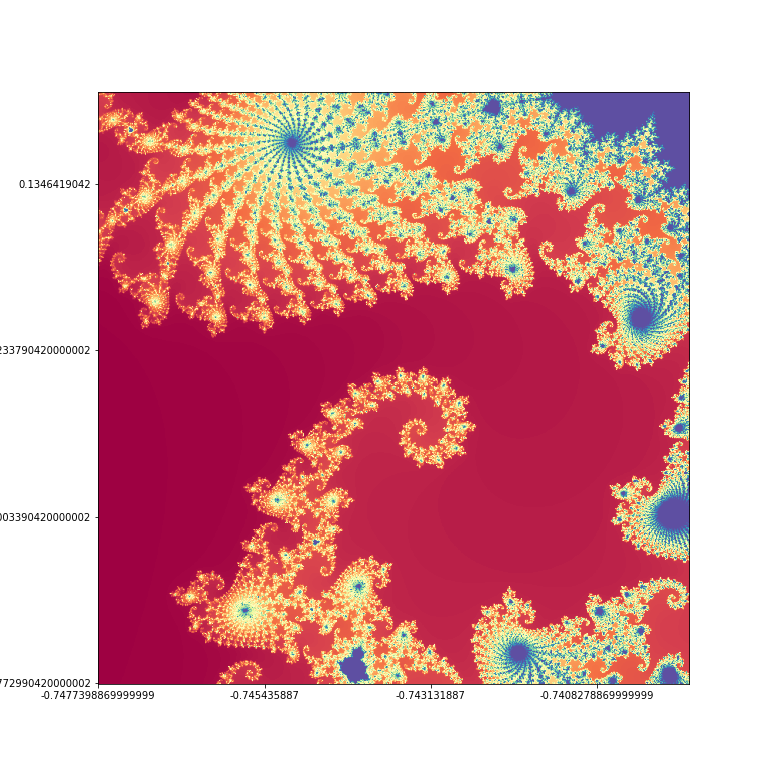

In [4]:
width = height = 768
maxiter = 300
concurrency = 16  # number of functions executed in parallel
xtarget = -0.7436438870
ytarget = 0.1318259042

# Initialize plot
fig, ax = create_subplots(width, height)

# Initial rectangle position
delta = 1
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta

mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

 # 1st zoom
delta = 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 2nd zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter += 30
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 3rd zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter += 30
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 4th zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter += 40
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 5th zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter += 40
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)

# 6th zoom
delta *= 0.4
xmin = xtarget - delta
xmax = xtarget + delta
ymin = ytarget - delta
ymax = ytarget + delta
maxiter = 500
mat = parallel_mandelbrot(xmin, xmax, ymin, ymax, width, height, maxiter, concurrency)
plot_matrix(mat, fig, ax, xmin, xmax, ymin, ymax, width, height)
